In [3]:
import matplotlib.pyplot as plt
import numpy as np


class ANN():
    
    def __init__(self, layers, eta):
        self.layers = layers
        self.eta = eta

    def f(self,x):
      return 1 / (1 + np.exp(-x))

    def f_deriv(self,x):
      return f(x) * (1 - f(x))

    def feed_forward(self,x,w,b):
      h = {1:x}
      z = {}
      for l in range(1,len(w)+1):
        if l == 1:
          node_in = x
        else:
          node_in = h[l]
        z[l+1] = W[l].dot(node_in) + b[l]
        h[l+1] =  f(z[l+1])
      return h, z

    def init_tri_values(self,nn_structure):
      tri_W = {}
      tri_b = {}
      for l in range(1,len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
      return tri_W, tri_b


    def calculate_out_layer_delta(self,y,h_out,z_out):
      return -(y-h_out)*f_deriv(z_out)


    def calculate_hidden_delta(self,delta_plus_1,w_l,z_l):
      return np.dot(np.transpose(w_l),delta_plus_1) * f_deriv(z_l)


    def train_nn(self,nn_structure, X, y, W, b ,iter_num= 10000, alpha=0.05):
      cnt = 0
      m = len(y)
      avg_cost_func = []
      print('Start gradient descent for {} iterations'.format(iter_num))
      while cnt < iter_num:
        if cnt%1000 == 0:
          print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(len(y)):
          delta = {}
          h, z = feed_forward(X[i, :], W, b)
          for l in range(len(nn_structure), 0, -1):
            if l == len(nn_structure):
              delta[l] = calculate_out_layer_delta(y[i, :], h[l], z[l])
              avg_cost += np.linalg.norm((y[i,:]-h[l]))
            else:
              if l > 1:
                delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
              tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis]))
              tri_b[l] += delta[l+1]
        for l in range(len(nn_structure) - 1, 0, -1):
          W[l] += -alpha * (1.0/m * tri_W[l])
          b[l] += -alpha * (1.0/m * tri_b[l])
        avg_cost = 1.0/m * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
      return W, b, avg_cost_func

In [2]:
model = ANN(3, .5)

In [100]:
w1 = np.array([[.15, .2], [.25, .3]])
w2 = np.array([[.4, .45], [.5, .55]])
b1 = np.array([.35, .35])
b2 = np.array([.6, .6])

W = {1:w1, 2:w2}
b = {1:b1, 2:b2}

x = np.array([[.05, .1]])
y = np.array([[.01, .99]])

nn_structure = [2,2,2]

In [110]:
W, b, avg_cost_func = train_nn(nn_structure, x, y, W, b)

Start gradient descent for 10000 iterations
Iteration 0 of 10000
Iteration 1000 of 10000
Iteration 2000 of 10000
Iteration 3000 of 10000
Iteration 4000 of 10000
Iteration 5000 of 10000
Iteration 6000 of 10000
Iteration 7000 of 10000
Iteration 8000 of 10000
Iteration 9000 of 10000


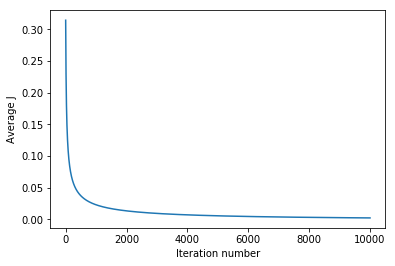

In [75]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [111]:
def predict_y(W, b, X, n_layers):
  m = X.shape[0]
  y = np.zeros(x.shape)
  for i in range(m):
    h, z = feed_forward(X[i, :], W, b)
    y[i] = h[n_layers]
  return y

from sklearn.metrics import accuracy_score
y_pred = predict_y(W, b, x, 3)
#accuracy_score(y, predict_y) * 100|

In [124]:
y_pred

array([[0.01321016, 0.98687074]])